In [198]:
def function1(input1):
    return input1 + " from function 1"

In [199]:
def function2(input2):
    return input2 + " from function 2"

In [200]:
def function3(input3):
    return input3 + " from function 3"

In [201]:
function1("Anil")


'Anil from function 1'

In [202]:
function2("choudary")


'choudary from function 2'

In [203]:
function3("R")

'R from function 3'

In [204]:
from langgraph.graph import Graph

In [205]:
workflow1 = Graph()

In [206]:
workflow1.add_node("func1",function1)

In [207]:
workflow1.add_node("func2",function2)

In [208]:
workflow1.add_edge("func1", "func2")

In [209]:
workflow1.set_entry_point("func1")

In [210]:
workflow1.set_finish_point("func2")

In [211]:
app = workflow1.compile()


In [212]:
from IPython.display import Image, display

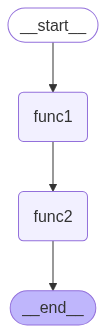

In [213]:
display(Image(app.get_graph().draw_mermaid_png()))

In [214]:
app.invoke("Hi, for first Langgraph task")

'Hi, for first Langgraph task from function 1 from function 2'

In [215]:
for output in app.stream("hi, this is Deepika"):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("--------")
        print(value)
        print("\n")

here is output from func1
--------
hi, this is Deepika from function 1


here is output from func2
--------
hi, this is Deepika from function 1 from function 2




In [241]:
from dotenv import load_dotenv
from langchain_groq import ChatGroq
load_dotenv()

def llm(input):
    model = ChatGroq(model="llama3-8b-8192")
    output = model.invoke(input)
    return output.content

In [242]:
def token_counter(input):
    token = input.split()
    token_number = len(token)
    return f"total token number in the generated answer is {token_number}"

In [243]:
workflow2 = Graph()

In [244]:
workflow2.add_node("My_LLM", llm)

In [245]:
workflow2.add_node("LLM_Output_token_counter", token_counter)

In [246]:
workflow2.add_edge("My_LLM", "LLM_Output_token_counter")

In [247]:
workflow2.set_entry_point("My_LLM")

In [248]:
workflow2.set_finish_point("LLM_Output_token_counter")

In [249]:
app = workflow2.compile()

In [250]:

app.invoke("can you tell me about the capital of India?")

'total token number in the generated answer is 373'

In [251]:
app.invoke("can you tell me about the capital of India in detail?")

'total token number in the generated answer is 715'